Diabetes prediction model with Balanced Data

This model was built with balanced dataset provided by https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators. It has an imbalance class where the 97 percent is overfit to class 0. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, 1 is for prediabetes and 2 for diabetes. This dataset has 21 feature variables and is balanced.

In [ ]:
!pip install mlxtend
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
#from imblearn.over_sampling import SMOTE
import os

In [ ]:
!wget 'https://docs.google.com/uc?export=download&id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy' -O health_data_imbalanced.csv

--2024-12-16 06:38:20--  https://docs.google.com/uc?export=download&id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy
Resolving docs.google.com (docs.google.com)... 142.251.163.100, 142.251.163.101, 142.251.163.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.163.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy&export=download [following]
--2024-12-16 06:38:20--  https://drive.usercontent.google.com/download?id=1Kk44I2sr69GEvlog5uhhyYHL-dSnshBy&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22738151 (22M) [application/octet-stream]
Saving to: 'health_data_imbalanced.csv'

health_data_imbalan 100%[===================>]  21.68

In [ ]:
health_data =  pd.read_csv('health_data_imbalanced.csv')

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
health_data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
health_data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Step 1: Copy the dataset
health_data_copy = health_data.copy()

# Step 2: Define columns for outlier detection
columns_to_check = ['BMI', 'MentHlth', 'PhysActivity', 'Age', 'Income']

# Step 3: Calculate Z-scores and replace outliers dynamically
for col in columns_to_check:
    # Calculate Z-scores for the column
    z_scores = zscore(health_data_copy[col])

    # Detect outliers (Z-score > 3 or < -3)
    outlier_indices = health_data_copy.index[np.abs(z_scores) > 3]

    # Replace outliers with the median
    health_data_copy.loc[outlier_indices, col] = health_data_copy[col].median()

In [ ]:
health_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.010679,5.576425,12.0,24.0,27.0,31.0,48.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


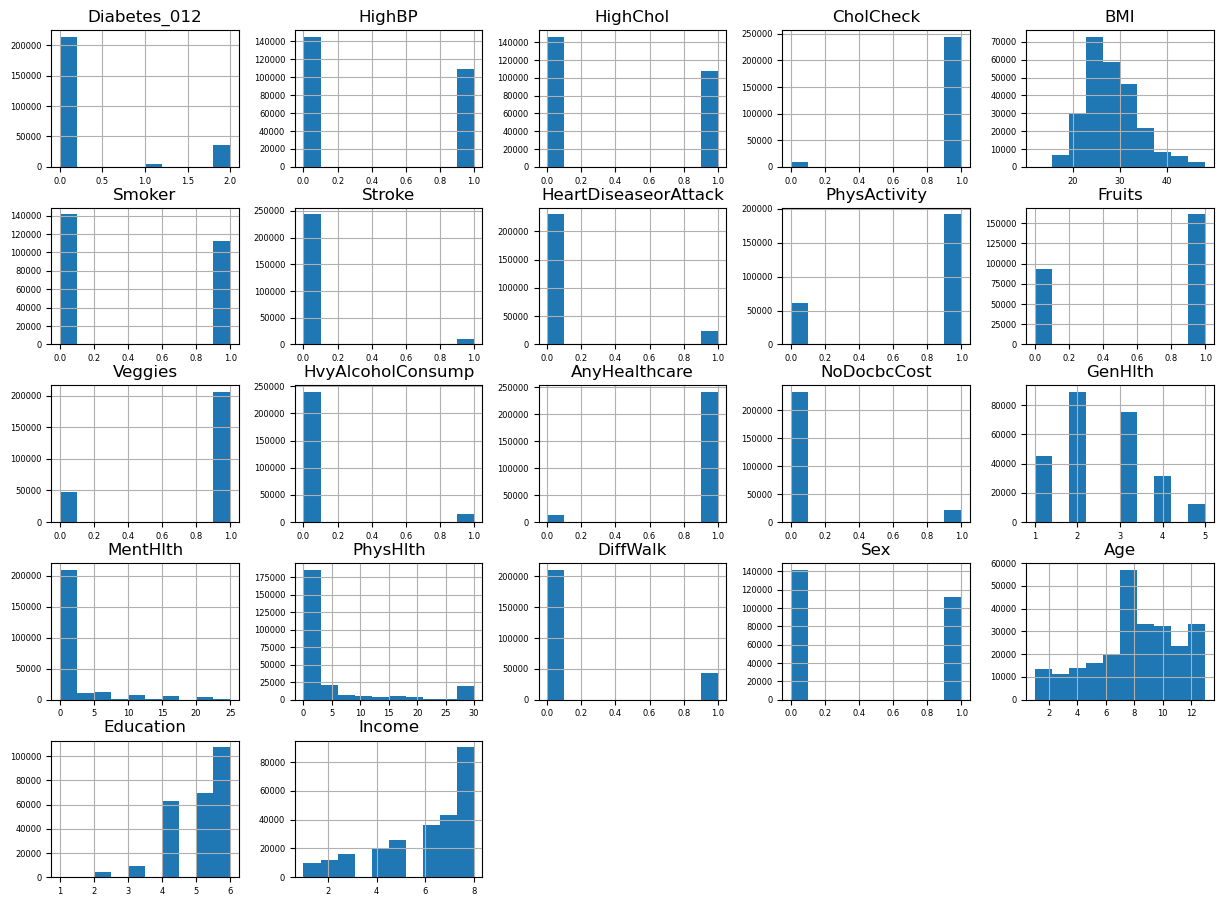

In [ ]:
#histograms to inspect data
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

health_data_copy.hist(bins=10, figsize=(15, 11))
plt.show()

In [ ]:
def plot_multiple_boxplots(df, columns=None):

    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()

    df_melted = df[columns].melt(var_name='Feature', value_name='Value')

    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Feature', y='Value', data=df_melted)
    plt.title('Boxplots of Health Data')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

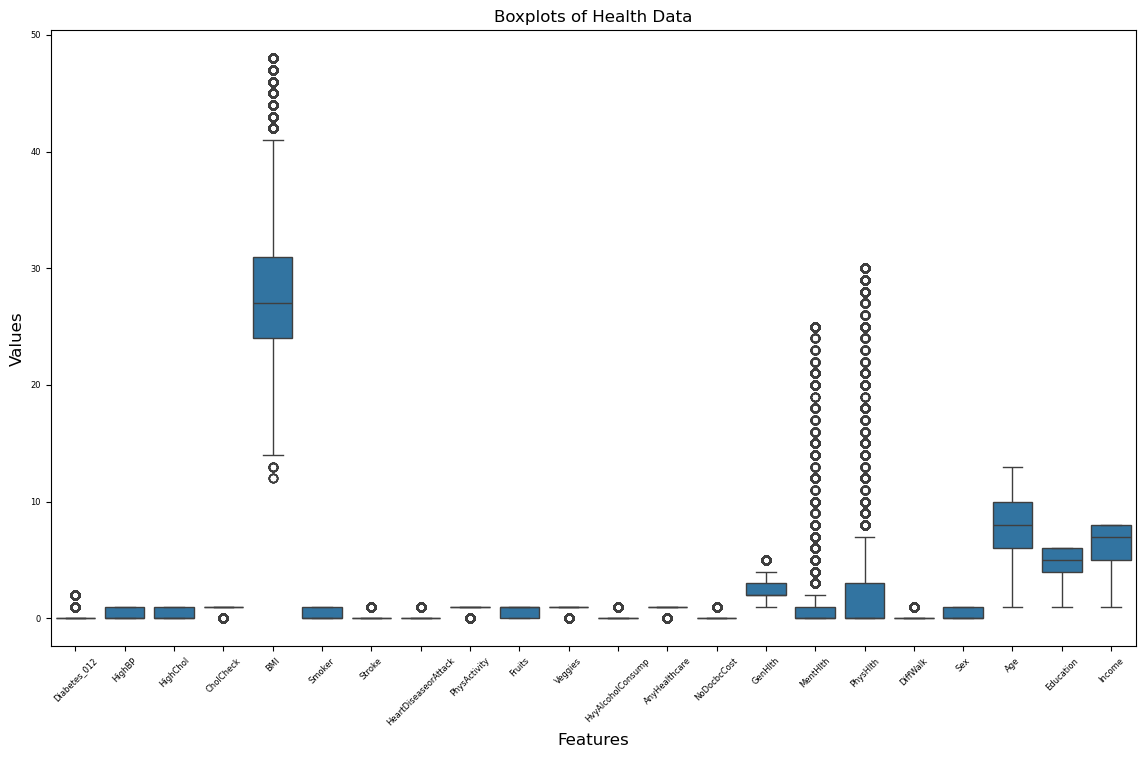

In [ ]:
#plot all features to identify outliers
plot_multiple_boxplots(health_data_copy)

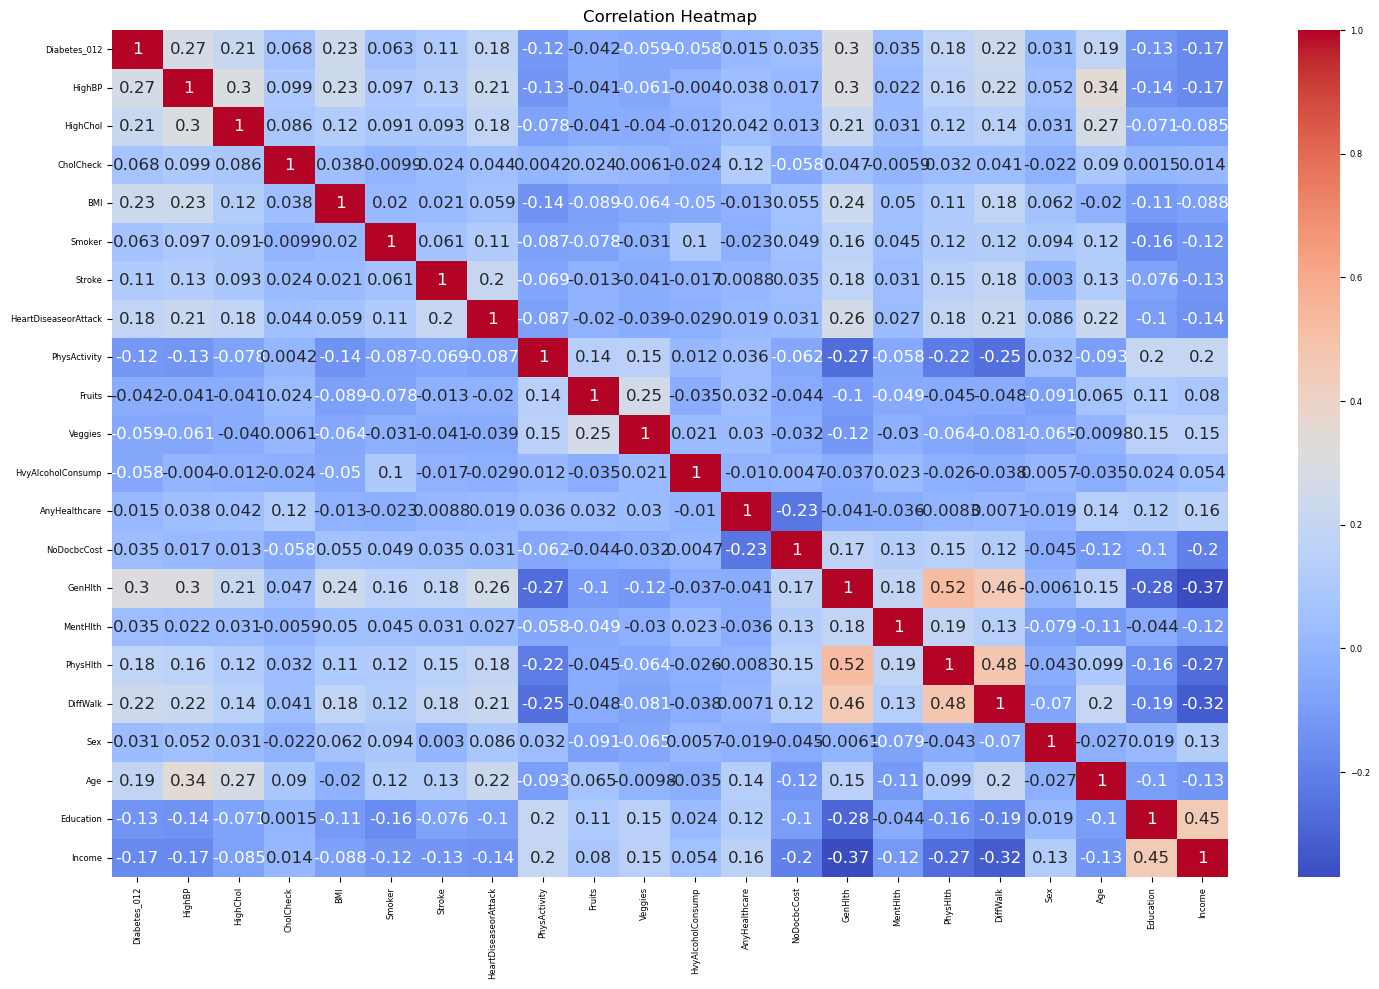

In [ ]:
#correlation heat map
plt.figure(figsize=(18, 11))
sns.heatmap(health_data_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Step 1: Combine Fruits and Veggies into HealthyDiet (simplify)
health_data_copy['HealthyDiet'] = health_data_copy['Fruits'] + health_data_copy['Veggies']
health_data_copy.drop(columns=['Fruits', 'Veggies'], inplace=True)  # Drop redundant features

# Step 2: Physical Health Interaction (simplify)
health_data_copy['PhysicalHealthIndex'] = health_data_copy['PhysHlth']  # Retain as is; avoid subtraction with MentHlth

# Step 3: Interaction between BMI and Age (keep)
health_data_copy['BMI_Age'] = health_data_copy['BMI'] * health_data_copy['Age']

# Step 4: Aggregate Risk Factors (Retain and Update)
health_data_copy['RiskFactorScore'] = (
    health_data_copy['HighBP'] +
    health_data_copy['HighChol'] +
    health_data_copy['HeartDiseaseorAttack'] +
    health_data_copy['Stroke']
)

# Step 5: Add Interaction Features with DiffWalk and Education
health_data_copy['DiffWalk_Education'] = health_data_copy['DiffWalk'] * health_data_copy['Education']

# Step 6: Update Numerical Features
numerical_features = ['BMI', 'Age', 'HealthyDiet', 'PhysicalHealthIndex',
                      'RiskFactorScore', 'BMI_Age', 'DiffWalk_Education']

# Standardize Important Numerical Features
scaler = StandardScaler()
health_data_copy[numerical_features] = scaler.fit_transform(health_data_copy[numerical_features])

# Step 7: Drop Low-Importance Features
low_importance_features = ['CholCheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth']
health_data_copy.drop(columns=low_importance_features, inplace=True)

# Step 8: Validate Changes
print(health_data_copy.info())
print(health_data_copy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   NoDocbcCost           253680 non-null  float64
 9   GenHlth               253680 non-null  float64
 10  DiffWalk              253680 non-null  float64
 11  Sex                   253680 non-null  float64
 12  Age                   253680 non-null  float64
 13  Education             253680 non-null  float64
 14  Income                253680 non-null  float64
 15  

In [ ]:
health_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,2.969213e-01,0.698160,0.000000,0.000000,0.000000,0.000000,2.000000
HighBP,253680.0,4.290011e-01,0.494934,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,253680.0,4.241209e-01,0.494210,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,253680.0,-2.083900e-17,1.000002,-2.871142,-0.719222,-0.181242,0.536065,3.584619
Smoker,253680.0,4.431686e-01,0.496761,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,253680.0,4.057080e-02,0.197294,0.000000,0.000000,0.000000,0.000000,1.000000
HeartDiseaseorAttack,253680.0,9.418559e-02,0.292087,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,253680.0,7.565437e-01,0.429169,0.000000,1.000000,1.000000,1.000000,1.000000
NoDocbcCost,253680.0,8.417692e-02,0.277654,0.000000,0.000000,0.000000,0.000000,1.000000
GenHlth,253680.0,2.511392e+00,1.068477,1.000000,2.000000,2.000000,3.000000,5.000000


In [ ]:
health_data_copy['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [ ]:
# Split data into features and target
X = health_data_copy.drop('Diabetes_012', axis=1)
y = health_data_copy['Diabetes_012']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Parameter distributions for RandomizedSearchCV
param_distributions_dt = {
    'max_depth': [None, 3, 10, 20],
    'min_samples_split': [2, 4, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}

param_distributions_rf = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples at leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider
    'bootstrap': [True, False],  # Bootstrap sampling
    'class_weight': ['balanced', 'balanced_subsample']  # Handle imbalance
}

# Apply RandomizedSearchCV for Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(
    estimator=dt_clf,
    param_distributions=param_distributions_dt,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42
)
random_search_dt.fit(X_train, y_train)

# Best Decision Tree model
best_dt = random_search_dt.best_estimator_
dt_predictions = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Apply RandomizedSearchCV for Random Forest
rf_clf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_distributions_rf,
    n_iter=10,
    scoring='f1_macro',
    cv=3,
    random_state=42
)
random_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = random_search_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Compare Results
results_comparison = pd.DataFrame({
    'Model': ['Decision Tree (Best)', 'Random Forest (Best)'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'F1 Score': [dt_f1, rf_f1]
})

# Print Best Parameters and Comparison
print("\nBest Parameters for Decision Tree:")
print(random_search_dt.best_params_)
print("\nBest Parameters for Random Forest:")
print(random_search_rf.best_params_)
print("\nModel Performance Comparison:")
print(results_comparison)


Best Parameters for Decision Tree:
{'min_samples_split': 20, 'max_depth': 10, 'criterion': 'gini'}

Best Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}

Model Performance Comparison:
                  Model  Accuracy  F1 Score
0  Decision Tree (Best)  0.847170  0.808805
1  Random Forest (Best)  0.798329  0.805879


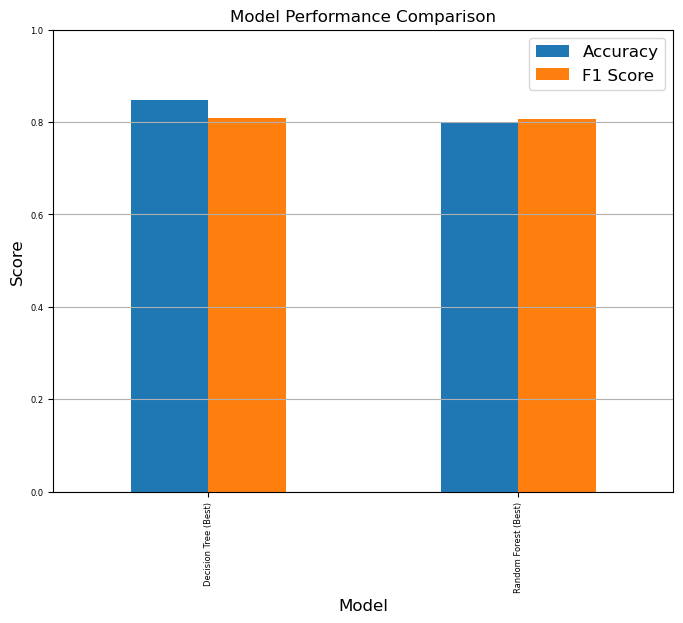

In [ ]:
# Visualize Comparison
results_comparison.set_index('Model').plot(kind='bar', figsize=(8, 6), ylim=(0, 1))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid(axis='y')
plt.show()

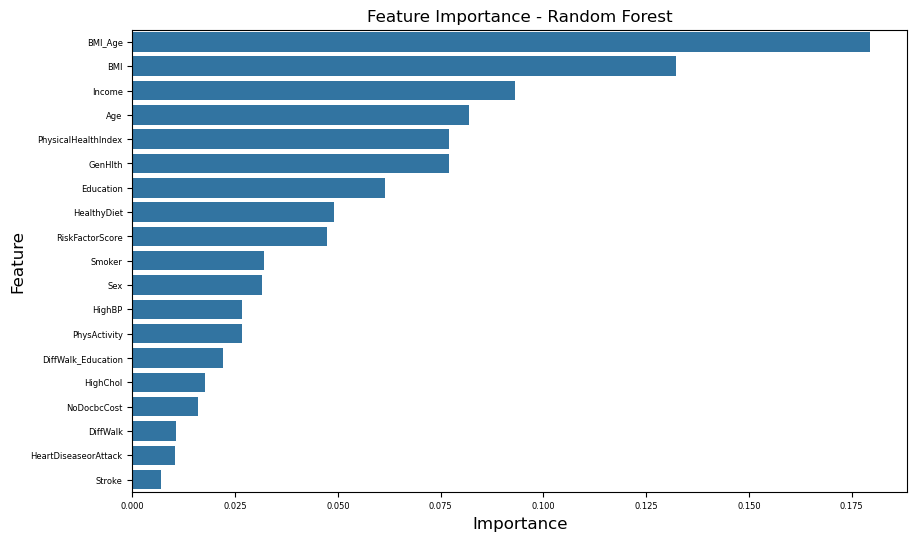

In [ ]:
#Feature importance

feature_importance = best_rf.feature_importances_
importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf)
plt.title("Feature Importance - Random Forest")
plt.show()

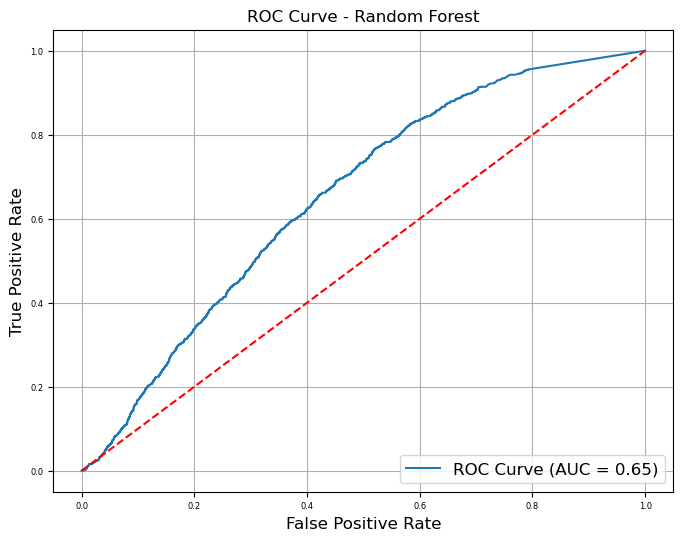

In [ ]:
#ROC curve
best_rf_clf = RandomForestClassifier(
    max_depth=random_search_rf.best_params_['max_depth'],
    min_samples_split=random_search_rf.best_params_['min_samples_split'],
    # Assuming 'criterion' was a parameter in your Random Forest search
    criterion=random_search_rf.best_params_.get('criterion', 'gini'),  # Default to 'gini' if not found
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
best_rf_clf.fit(X_train, y_train)
rf_proba = best_rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**ROC curve for Random Forest with Value 0.65**

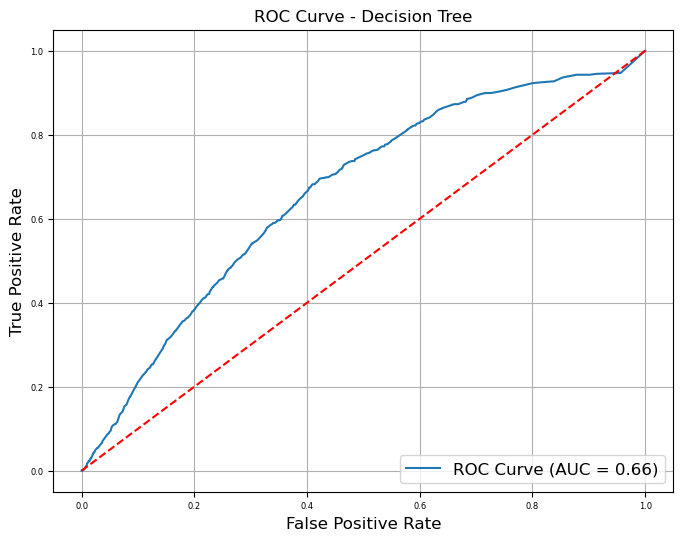

In [ ]:
#ROC curve for Decision tree
best_dt_clf = DecisionTreeClassifier(
    max_depth=random_search_dt.best_params_['max_depth'],
    min_samples_split=random_search_dt.best_params_['min_samples_split'],
    criterion=random_search_dt.best_params_.get('criterion', 'gini'),
    random_state=42
)
# Removed 'n_estimators' and 'class_weight' parameters
# as they are not applicable to DecisionTreeClassifier
best_dt_clf.fit(X_train, y_train)
rf_proba = best_dt_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**ROC curve for Decision Tree with the value 0.66**

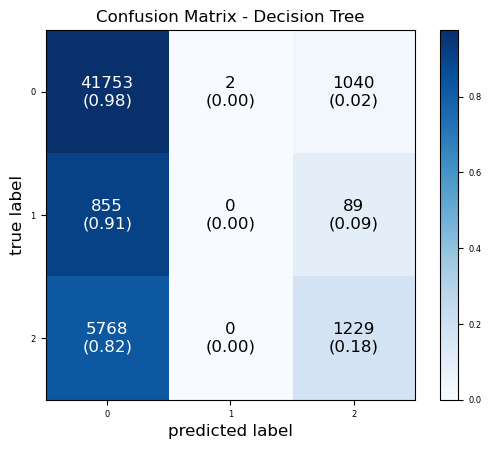

In [ ]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)
plot_confusion_matrix(conf_mat=dt_cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

* True positives predicted on class 0 with 98 percent and False positive rate is 2 percent.
* Class 1 performed poorly by classifying the sample either as class 0 or 2
*  True positives predicted on class 2 are at 17 percent and 83 percent misclassification as class 0.
* Overall accuracy 85 percent

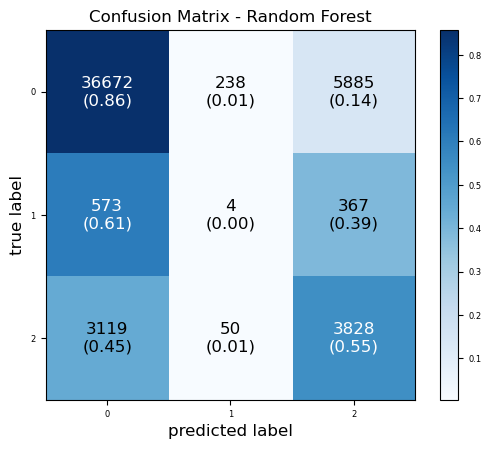

In [ ]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(conf_mat=rf_cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Confusion Matrix - Random Forest')
plt.show()

* True positives predicted class 0 with 87 percent are correct and False positives rate is at 13 percent.
* Class 1 performed poorly in predicting TP and predicted False positive  603 as 0 and 339 as 2.
* Class 2 predicted False positive 3215 with 46 percent  correctness as 0, 28 as 1 and 3754 with 54 percent correct as True positives.
* Overall accuracy is 80 percent  and 87 percent recall with strong predictions on class 0
* Model performed poorly on class 1 and moderately with 54 percent on class 2.


In [ ]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88     42795
         1.0       0.01      0.00      0.01       944
         2.0       0.38      0.55      0.45      6997

    accuracy                           0.80     50736
   macro avg       0.43      0.47      0.45     50736
weighted avg       0.82      0.80      0.81     50736



In [ ]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.52      0.18      0.26      6997

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

